El  objetivo de nuestro trabajo es predecir la edad de una zarigueya hembra a partir del tamaño de su craneo. Segun la revista de  Biologia tropical pag 313-320 "crecimiento y desarrollo  del craneo en marsupiales" Lopez R  (1997) en  mamíferos  como la zarigueya, el craneo se desarolla a medida que el animal crece, por ejemplo, si el craneo es pequeño y menos desarollado podemos asegurar que es una zarigueya joven, pero si por el contrario el craneo es más grande y robusto la zarigueya esta en una etapa adulta

El estudio de este problema es importante, pues tiene implicaciones ecológicas y conservativas dado que al saber cuantas zarigueyas jovenes o adultas hay en cierta poblacion ayuda a los ecologistas  a comprender su estructura poblacional, su taza de  reproducción y supervivencia y es muy útil para estrategias de conservación 





In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./possum.csv')


Matplotlib is building the font cache; this may take a moment.


In [8]:
df.sample(10)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
54,55,4,other,m,2.0,103.1,63.2,92.5,38.0,72.5,44.9,16.4,30.5,36.0
67,68,5,other,m,5.0,94.1,56.0,88.5,38.0,65.9,43.1,17.4,27.0,30.0
43,44,2,Vic,m,NaN,85.1,51.5,76.0,35.5,70.3,52.6,14.4,23.0,27.0
88,89,7,other,m,6.0,97.7,58.4,84.5,35.0,64.4,46.2,14.4,29.0,30.5
94,95,7,other,m,4.0,91.6,56.6,88.5,37.5,64.5,45.4,14.9,27.0,31.0
20,21,1,Vic,f,3.0,95.9,58.1,96.5,39.5,77.9,52.9,14.2,30.0,40.0
62,63,5,other,f,6.0,92.0,56.4,88.5,38.0,64.1,46.3,15.2,25.5,28.5
53,54,4,other,m,7.0,96.9,63.0,91.5,43.0,71.3,46.0,17.5,30.0,36.5
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
18,19,1,Vic,f,5.0,94.4,55.4,90.5,35.0,73.4,53.9,15.2,28.0,32.0


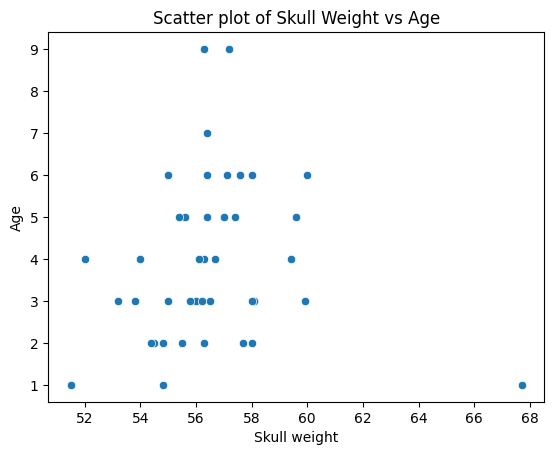

In [ ]:


# Assign x and y with on-the-go filtering
x = df.loc[df['sex'] == 'f', 'skullw']
y = df.loc[df['sex'] == 'f', 'age']

# Create a scatter plot
sns.scatterplot(x=x, y=y)

y_prediccion = pd.DataFrame(map(lambda x: x*0.6 , x))

# Add labels and a title (optional)
plt.xlabel('Skull weight')  # Adjust the label based on your data
plt.ylabel('Age')
plt.title('Scatter plot of Skull Weight vs Age')

# Show the plot
plt.show()
